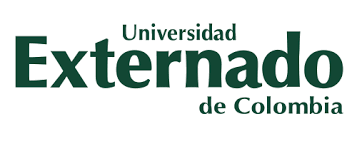

**JUAN SEBASTIAN PRIETO DUEÑAS**

**JOSE DAVID OBANDO ACOSTA**

**TALLER 2**

**FINANZAS COMPUTACIONALES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
import cvxpy as cp
from scipy import stats
%pip install yfinance
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


***Punto 1***

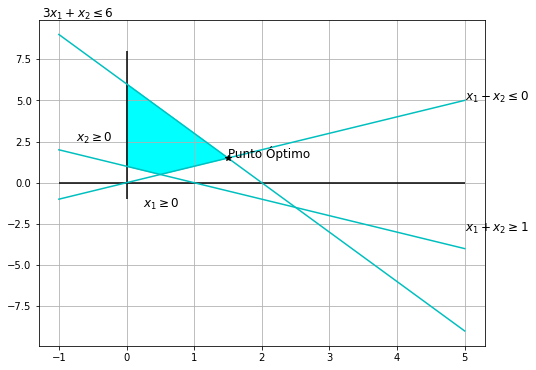

In [2]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Dibujar lineas de restricción
ax.hlines(0, -1, 5)
ax.vlines(0, -1, 8)
ax.plot(np.linspace(-1, 5, 100), 1-1*np.linspace(-1, 5, 100), color="c")
ax.plot(np.linspace(-1, 5, 100), np.linspace(-1, 5, 100), color="c")
ax.plot(np.linspace(-1, 5, 100), 6-3*np.linspace(-1, 5, 100), color="c")
ax.text(5, -3, "$x_1 + x_2 \geq 1$", size=12)
ax.text(5, 5, "$x_1 - x_2 \leq 0$", size=12)
ax.text(-1.25, 10, "$3x_1 + x_2 \leq 6$", size=12)
ax.text(0.25, -1.5, "$x_1 \geq 0$", size=12) 
ax.text(-0.75, 2.5, "$x_2 \geq 0$", size=12) 

# Dibujar la región Factible
feasible_set = Polygon(np.array([[0, 1], 
                                 [0.5, 0.5], 
                                 [1.5, 1.5], 
                                 [0, 6]]), 
                       color="cyan")
ax.add_patch(feasible_set)


# Dibujar el punto óptimo
ax.plot(1.5, 1.5, "*", color="black")
ax.text(1.5, 1.5, "Punto Óptimo", size=12)

plt.show()

Por lo consiguiente, sólo con la restricción X1-X2<=0 y 3X1+X2<=0, ya que estas dos son las que llegan al punto optimo de la optimización.

***Punto 2***

In [ ]:
c = np.array([0.1,0.15,0.16,0.08]) #Tasas
A = np.array([[1,1,1,1]]) #4 fondos 
b = np.array([80]) 

D = np.array([[0.5,0.3,0.25,0.6],
              [0.3,0.1,0.4,0.2],
              [0.2,0.6,0.35,0.2]])
d = np.array([28,24,12])

resultado = linprog(-c,A_ub=-D,b_ub=-d,A_eq=A,b_eq=b, method='simplex')
resultado
#x.value

     con: array([0.])
     fun: -10.989473684210527
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([-3.55271368e-15, -3.55271368e-15,  1.60000000e+01])
  status: 0
 success: True
       x: array([ 0.        , 12.63157895, 46.31578947, 21.05263158])

Por medio de la optimización se evidencia que no se debe invertir un solo peso en el primer fondo.
Tambien evidenciamos que el fondo numero tres es el mas optimo para recibir el mayor volumen de inversion 

In [ ]:
import cvxpy as cp
n = 4
x = cp.Variable(n)

objective = cp.Maximize(c.T @ x )
constraints = [A @ x == b,D @ x >= d,x>=0]
prob = cp.Problem(objective, constraints)

result = prob.solve()
# The optimal value for x is stored in `x.value`.
round(pd.DataFrame(x.value),4)


,0
0,0.0000
1,12.6316
2,46.3158
3,21.0526


Y con este otro metodo de optimización confirmamos que esos sí son los valores que resuelven el ejercicio de la mejor manera.

***Punto 3***

Con CVXPY

In [ ]:
#Construcción de vectores
b = np.array([150, 100, -200, 200, -50, -300])
c = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1]) #Función objetivo
rx = np.array([1.01])  #tasa del crédito
ry = np.array([1.02]) #Tasa del bono
rz = np.array([1.003]) #Tasa excedente
A = np.array([[1,0,0,0,0, 1,0,0, -1,0,0,0,0,0],
              [-rx,1,0,0,0, 0,1,0, rz,-1,0,0,0,0],
              [0,-rx,1,0,0, 0,0,1, 0,rz,-1,0,0,0],
              [0,0,-rx,1,0, -ry,0,0, 0,0,rz,-1,0,0],
              [0,0,0,-rx,1, 0,-ry,0, 0,0,0,rz,-1,0],
              [0,0,0,0,-rx, 0,0,-ry, 0,0,0,0,rz,-1]])

#Solución con cvxpy
n = len(c) # # de elementos que requiere el vector c
x = cp.Variable(n) #Mismo tamaño de c porque se debe operar x con c

objective = cp.Maximize(c.T @ x )
constraints = [A @ x == b, x>=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
sol = round(pd.DataFrame(x.value),6)
sol


,0
0,0.000001
1,42.686747
2,0.000000
3,0.000000
4,8.459517
5,150.000000
6,57.313253
7,195.057783
8,0.000001
9,0.000000


En este caso notamos que para el año 1 hay una emison de 150 en bonos , para el años 2 se contrae un credito por 42.6 y se emiten bonos por 57 , para el año 3 se emiten bonos por 195.05 y se tiene un excendente de 351.94 , en el año 5 se obtiene un credito por 8.4 , finalmente en el año 6 se obtiene una ganancia de 92.49

en este caso la empresa debera pagar entre enero y junio por 1.8

Con linprog

In [ ]:
c=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1]) #Retorno esperado ya que en el utlimo año es donde se espera el retorno
rx= np.array([1.01])# Tasa interés crédito
ry= np.array([1.02])# Tasa interés bono
rz= np.array([1.003])# Tasa rentabilidad
A=np.array([[1,0,0,0,0, 1,0,0, -1,0,0,0,0,0],
            [-rx,1,0,0,0, 0,1,0, rz,-1,0,0,0,0],
            [0,-rx,1,0,0, 0,0,1, 0,rz,-1,0,0,0],
            [0,0,-rx,1,0, -ry,0,0, 0,0,rz,-1,0,0],
            [0,0,0,-rx,1, 0,-ry,0, 0,0,0,rz,-1,0],
            [0,0,0,0,-rx, 0,0,-ry, 0,0,0,0,rz,-1]]) 

b=np.array([150,100,-200,200,-50,-300])

resultado=linprog(-c,A_eq=A,b_eq=b,method='revised simplex') #c negativo por maximizar 
resultado

     con: array([ 2.84217094e-14, -1.42108547e-14, -5.68434189e-14,  2.84217094e-14,
        0.00000000e+00,  0.00000000e+00])
     fun: -92.49694915254233
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([  0.        ,  50.98039216,   0.        ,   0.        ,
         0.        , 150.        ,  49.01960784, 203.43436358,
         0.        ,   0.        , 351.9441675 ,   0.        ,
         0.        ,  92.49694915])

En este caso notamos que para el año 1 se emtien bonos por 150 , en el año 2 se contrae credito por 50.9 y se emiten bonos por 49.01 , en el año 3 se emiten bonos por 203.43 ese mismo año hya un excendete de 351.944 para que en el año 6 quede una ganacia de 92.49

En este caso al empresa pagara 2,06 en interes por prestamos

***Punto 4***

In [30]:
from numpy.core.fromnumeric import shape
# Información histórica para XOM (EXXON MOBIL)
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
xom = ["XOM"]
p_xom = yf.download(xom,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_xom = np.log(p_xom/p_xom.shift(1)).dropna()


[*********************100%***********************]  1 of 1 completed




> Se toma como variable independinete el sp 500 y se realiza el calculo de sus alfas y sus betas



In [5]:
indice = yf.download("^GSPC",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_indice = np.log(indice/indice.shift(1)).dropna()
r_indice.shape

[*********************100%***********************]  1 of 1 completed


(60,)

In [18]:
#la operacio matricial igual a la operacion de los betas
t = len(r_indice)
unos = pd.DataFrame(np.repeat(1,t))
r_indice2 = pd.DataFrame(r_indice)
r_aapl2 = pd.DataFrame(r_xom)
variables = np.concatenate((unos,r_indice2),1)
X = variables.T @ variables
Xy = variables.T @ r_xom
Sol= np.linalg.solve(X,Xy)
Sol

array([-0.02065055,  1.37747375])

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(pd.DataFrame(r_indice), pd.DataFrame(r_xom))
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [-0.02065055]
betas = [[1.37747375]]




> Se comfirma que de forma matricial y con linprog dan los mismos datos de los cuales podemos concluir que la accion de EXXON MOBIl esta subvalorada , el beta quiere decir que la accion tiene un riesgo superior al del mercado de casi un 0.37 mas





> Se realiza el calculo del alfa y del beta usando un ETF llamdo (United States Brent Oil Fund, LP (BNO)) ya que es una empresa dedicada a la industria pretrolera , este ETF  replica el comportamiento del precio del BRENT



In [37]:
commoditie = yf.download("BNO",start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_commoditie = np.log(commoditie/commoditie.shift(1)).dropna()
r_commoditie.shape


[*********************100%***********************]  1 of 1 completed


(60,)

In [38]:
t = len(r_commoditie)
unos = pd.DataFrame(np.repeat(1,t))
r_commoditie2 = pd.DataFrame(r_commoditie)
r_xom2 = pd.DataFrame(r_xom)
variables = np.concatenate((unos,r_commoditie2),1)
X = variables.T @ variables
Xy = variables.T @ r_xom
Sol= np.linalg.solve(X,Xy)
Sol

array([-0.00700274,  0.37898298])

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(pd.DataFrame(r_commoditie), pd.DataFrame(r_xom))
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [-0.00700274]
betas = [[0.37898298]]




> Notamos que el alfa es muy cercano a 0 es decir el activo esta subvalorado con respecto al ETF , con respecto al beta vemos que esta por debajo de uno lo que significa que su riesgo es menor al del mercado





> Utilizamos ahora ambas variables independientes para al calcular los betas y alfas finales 



In [34]:
indice = yf.download(["BNO","^GSPC"],start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_indice = np.log(indice/indice.shift(1)).dropna()
r_indice.shape

[*********************100%***********************]  2 of 2 completed


(60, 2)

In [35]:
t = len(r_indice)
unos = pd.DataFrame(np.repeat(1,t))
r_indice2 = pd.DataFrame(r_indice)
r_xom2 = pd.DataFrame(r_xom)
variables = np.concatenate((unos,r_indice2),1)
X = variables.T @ variables
Xy = variables.T @ r_xom
Sol= np.linalg.solve(X,Xy)
Sol

array([-0.01775917,  0.16540837,  1.07851733])

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(pd.DataFrame(r_indice), pd.DataFrame(r_xom))
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [-0.01775917]
betas = [[0.16540837 1.07851733]]




> Podemos concluir que el alfa del activo exxon mobil es menor a 1 lo que lo convierte en un activo subvalorado aunque puede ser peligroso ya que presento rendimientos menores a los esperados y una gran oportunidad para invertir , los betas con respecto al ETF del bren es de 0.16 es decir presenta menor riesgo que ese ETF y con respecto al SP500 es de 1.07 esta por encima del mercado



Punto 5



> Con linprog



In [ ]:
objetivo=np.array([109,94.8,99.5,93.1,97.2,92.9,110,104,102,95.2,0,0,0,0,0,0])
restricciones=np.array([[10, 7, 8, 6, 7, 5, 10, 8,7,100, -1, 0, 0, 0, 0, 0],
              [10, 7, 8, 6, 7, 5, 10, 8, 7, 0, 1, -1, 0, 0, 0, 0],
              [10, 7, 8, 6, 7, 5, 110,108,0,0, 0, 1, -1, 0, 0, 0],
              [10, 7, 8, 6, 7, 105, 0, 0, 0,0, 0, 0, 1, -1, 0, 0],
              [10, 7, 8, 106, 107, 0, 0,0,0,0, 0, 0, 0, 1, -1, 0],
              [110, 107, 108, 0, 0, 0,0,0,0,0, 0, 0, 0, 0, 1, -1]])

rhseq=np.array([100,200,800,100,800,1200])
limits=[(0,float('inf')) for x in range(len(objetivo))]
optimizacion=linprog(objetivo,A_eq=restricciones,b_eq=rhseq,bounds=limits,method = 'Simplex')
optimizacion



     con: array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.27373675e-13])
     fun: 2305.6916480037903
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 0.        , 11.21495327,  0.        ,  6.63384513,  0.        ,
        0.        ,  0.        ,  6.00868362,  0.        ,  0.        ,
       66.37721263, 32.75442526,  0.        , 18.30774366,  0.        ,
        0.        ])

Con cvxp

In [ ]:
rhseq = np.array([100, 200, 800, 100, 800, 1200])
objetivo = np.array([109, 94.8, 99.5, 93.1, 97.2, 92.9, 110, 104, 102, 95.2, 0, 0, 0, 0, 0, 0])
A = np.array([[10, 7, 8, 6, 7, 5, 10, 8,7,100, -1, 0, 0, 0, 0, 0],
              [10, 7, 8, 6, 7, 5, 10, 8, 7, 0, 1, -1, 0, 0, 0, 0],
              [10, 7, 8, 6, 7, 5, 110,108,0,0, 0, 1, -1, 0, 0, 0],
              [10, 7, 8, 6, 7, 105, 0, 0, 0,0, 0, 0, 1, -1, 0, 0],
              [10, 7, 8, 106, 107, 0, 0,0,0,0, 0, 0, 0, 1, -1, 0],
              [110, 107, 108, 0, 0, 0,0,0,0,0, 0, 0, 0, 0, 1, -1]])


n = len(objetivo)
x = cp.Variable(n)

objective = cp.Minimize(objetivo.T @ x )
constraints = [A @ x >= b, x>=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
resultado = round(pd.DataFrame(x.value),4)
resultado

,0
0,0.0000
1,11.2150
2,0.0000
3,6.6338
4,0.0000
5,0.0000
6,0.0000
7,6.0087
8,-0.0000
9,0.0000


Por ende, la optimización nos informa que, no se debe invertir nada en los bonos 1, 3, 5, 6, 7, 9 y el 10, para con ello si poder llegar a cumplir la optimización. ademas nos quedan saldos positivos en los años 1 ,2 y 4